# Data

The data is collected from the source https://www.covid19india.org/demographics.
This dataset is routinely updated by a group of volunteers. In this notebook, we are using the data upto 22nd of April 2020.

And another dataset from Kaggle's Novel Coronavirus Dataset(https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?rvi=1).

For January and February 2020 data, we are refering `Kaggle` dataset and for rest `covid19India` dataset

In [177]:
import pandas as pd
from IPython.display import Image
df = pd.read_csv("covidIndiaData.csv")
df1 = pd.read_csv("time_series_covid_19_confirmed.csv")

In [99]:
nums = df1[df1['Country/Region']=='India'].sum().drop(['Province/State','Country/Region','Lat','Long'])

In [2]:
df.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes'],
      dtype='object')

In [3]:
df.head()

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,1,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
1,2,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
2,3,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan
3,4,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria
4,5,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact"


In [4]:
df['Date Announced']= pd.to_datetime(df['Date Announced'], format='%d/%m/%Y')

In [5]:
df['Date Announced'].unique()

array(['2020-01-30T00:00:00.000000000', '2020-02-02T00:00:00.000000000',
       '2020-02-03T00:00:00.000000000', '2020-03-02T00:00:00.000000000',
       '2020-03-03T00:00:00.000000000', '2020-03-04T00:00:00.000000000',
       '2020-03-05T00:00:00.000000000', '2020-03-06T00:00:00.000000000',
       '2020-03-07T00:00:00.000000000', '2020-03-08T00:00:00.000000000',
       '2020-03-09T00:00:00.000000000', '2020-03-10T00:00:00.000000000',
       '2020-03-11T00:00:00.000000000', '2020-03-12T00:00:00.000000000',
       '2020-03-13T00:00:00.000000000', '2020-03-14T00:00:00.000000000',
       '2020-03-15T00:00:00.000000000', '2020-03-16T00:00:00.000000000',
       '2020-03-17T00:00:00.000000000', '2020-03-18T00:00:00.000000000',
       '2020-03-19T00:00:00.000000000', '2020-03-20T00:00:00.000000000',
       '2020-03-21T00:00:00.000000000', '2020-03-22T00:00:00.000000000',
       '2020-03-23T00:00:00.000000000', '2020-03-24T00:00:00.000000000',
       '2020-03-25T00:00:00.000000000', '2020-03-26

In [6]:
patietsByDate = df.groupby(by = ['Date Announced'], axis = 0).count()['Patient Number']

# No of cases per day

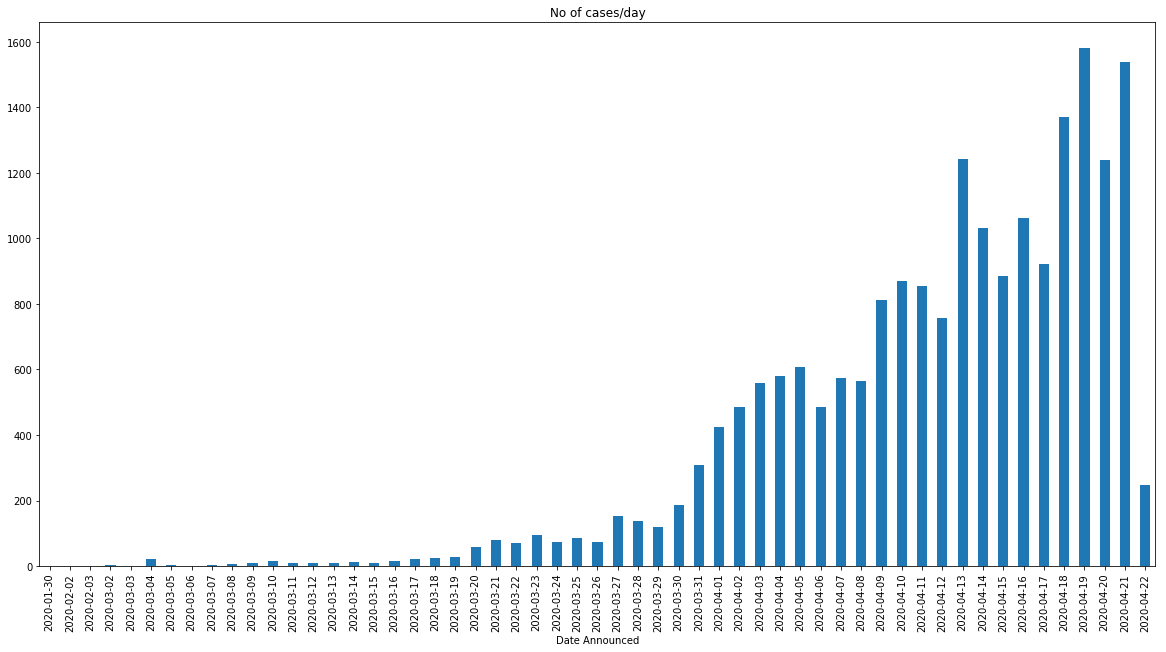

In [10]:
%matplotlib inline
df['Date Announced'] = df['Date Announced'].astype("datetime64")
df['Patient Number'].groupby(df['Date Announced'].dt.date).count().plot(kind="bar", figsize=(20,10), 
                                                                        title ="No of cases/day",
                                                                        fontsize = 10)

In [80]:
cumsum = patietsByDate.sort_index(level='Date Announced').cumsum()

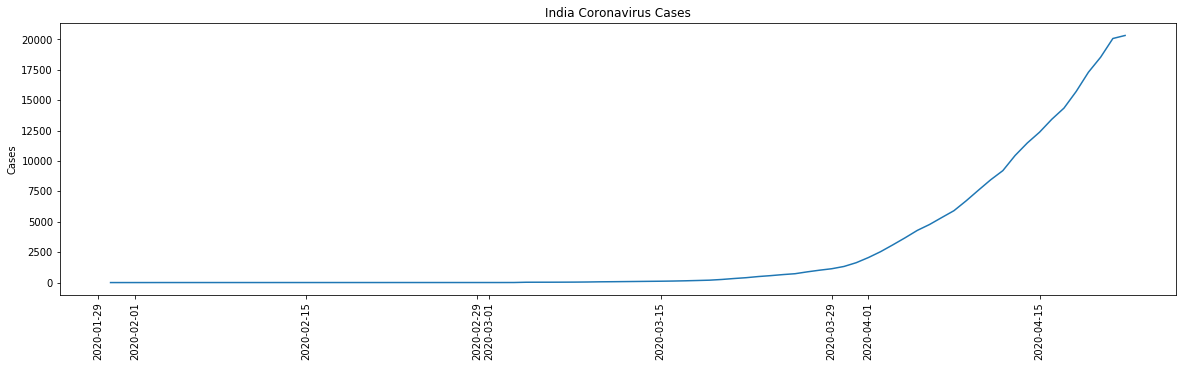

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
plt.plot(cumsum)
plt.xticks(rotation=90)
plt.ylabel('Cases')
plt.title("India Coronavirus Cases")
plt.show()

# Finding R-naught value in India for COVID19

The `R-Naught` of a disease, or the `contagiousness`, represents how transmissible the disease is. An R-Naught of 2 means that for every one person with the disease, two more people are infected. A fractional R-Naught means that the epidemic is dying down. Hepatitis C and Ebola have an R-Naught of 2, HIV and SARS 4, and Measles 18, to give a few examples.


The `R-Naught (R0)` of a disease is usually publicly declared by the World Health Organization after careful and lengthy analysis of various factor such as the infectious period, contact rate, mode of transmission, etc.
In this article, we’ll handwrite a program that optimizes an exponential model to the data to find the R0 of the coronavirus in Python. While this is in no means a substitute for the WHO and other health agencies’ findings, it is a good way to gauge just how contagious the coronavirus is with the current lack of information.


In this notebook, we’ll handwrite a program that optimizes an exponential model to the data to find the R0 of the coronavirus in Python. While this is in no means a substitute for the WHO and other health agencies’ findings, it is a good way to gauge just how contagious the coronavirus is with the current lack of information.

# R-naught Model

Our model will have a very simple equation:

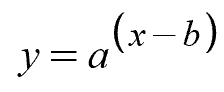

In [178]:
Image(filename='a.png')

…where y is the forecasted number of cases and x is the number of days since the first confirmed case. a and b are the only two parameters that will allow changing.

a controls how steep the curve will be. A smaller a value represents a less steep curve, and a higher a value represents a steeper curve.

a is also the R0 value. For each number of days x after the epidemic begins, the number of new cases multiplies by a factor of a — for every one person infected on day x, a more people will be infected on day x + 1.
This also provides another representation of what different quantities of R0 values mean.

# Fitting the Model
To fit the model, we will implement a very simple yet effective gradient descent algorithm. 

The process is:

1. Initialize a and b to 1 and 30, respectively.
2. Initialize lr1 and lr2 to 0.00005 each. (lr1 and lr2 are the learning rates for a and b, respectively. More on this soon.)
3. Take the current value of b and create two new variables for consideration, b + lr1 and b - lr2. These two will be named b1 and b2.
4. Evaluate the mean absolute error between the model using b1 against the real data.
5. Evaluate the mean absolute error between the model using b2 against the real data.
6. Whichever variant of b has a lower mean absolute error becomes the new b.
7. Repeat steps 3 through 6 for a. Since a is a more important metric than b, a is second (its value is updated last, meaning it has the 'final say').
8. Repeat steps 3 through 7 ten thousand times.


Summarizing the steps, this approach towards adjusting a and b takes linear steps in the right direction. It has no momentum (imagine a ball rolling down the error space - as it rolls down, it speeds up), meaning that as soon as it reaches a local minima, it stays there. While this would be a problem for neural networks that have hundreds of thousands of parameters, it works fine for only two variables: using advanced optimizers is definitely overkill in this scenario.
Let’s get started implementing the algorithm.

In [145]:
prevDate = []
prevDate = df1[df1['Country/Region']=='India'][['1/22/20', '1/23/20',
                                                '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', 
                                                '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
                                                '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
                                                '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20',
                                                '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', 
                                                '2/23/20', '2/24/20','2/25/20', '2/26/20', '2/27/20', 
                                                '2/28/20', '2/29/20', '3/1/20']].sum().tolist()

y= prevDate + (cumsum.tolist()[:-1])
x= range(len(y))

#Obtain estimate
import ast
def get_error(a,b):
    error = 0
    for index in x:
        error += abs((a**(x[index]-b)) - (y[index]))
    return error / len(x)

In [147]:
y = df1[df1['Country/Region']=='India'].sum().drop(['Province/State','Country/Region','Lat','Long']).tolist()
x = range(len(y))

In [169]:
a = 1
lr1 = 0.0001
b = 5
lr2 = 0.0001

iterations = 10_0000

global_mem = []

for iteration in range(iterations):

    b1 = b + lr2
    b2 = b - lr2
    if get_error(a,b1) < get_error(a,b2):
        b = b1
    else:
        b = b2

    a1 = a + lr1
    a2 = a - lr1
    if get_error(a1,b) < get_error(a2,b):
        a = a1
    else:
        a = a2

    global_mem.append(get_error(a,b))
    
    if iteration % 1_0000 == 0:
        print('ITERATION {}'.format(iteration))
        print("{'A':"+str(a)+", 'B':"+str(b)+"}")
        print('Error:',global_mem[-1],'\n')

ITERATION 0
{'A':1.0001, 'B':4.9999}
Error: 2066.0071501148705 

ITERATION 10000
{'A':1.1252999999999862, 'B':4.874700000000292}
Error: 254.17692374220857 

ITERATION 20000
{'A':1.1252999999999862, 'B':4.874700000000292}
Error: 254.17692374220857 

ITERATION 30000
{'A':1.1252999999999862, 'B':4.874700000000292}
Error: 254.17692374220857 

ITERATION 40000
{'A':1.1252999999999862, 'B':4.874700000000292}
Error: 254.17692374220857 

ITERATION 50000
{'A':1.1252999999999862, 'B':4.874700000000292}
Error: 254.17692374220857 

ITERATION 60000
{'A':1.1252999999999862, 'B':4.874700000000292}
Error: 254.17692374220857 

ITERATION 70000
{'A':1.1252999999999862, 'B':4.874700000000292}
Error: 254.17692374220857 

ITERATION 80000
{'A':1.1252999999999862, 'B':4.874700000000292}
Error: 254.17692374220857 

ITERATION 90000
{'A':1.1252999999999862, 'B':4.874700000000292}
Error: 254.17692374220857 



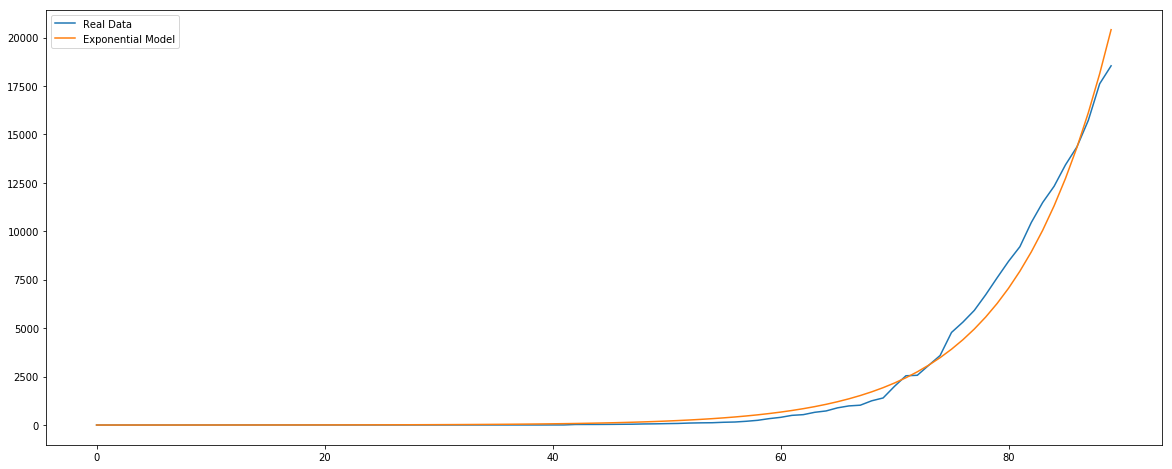

In [170]:
best_set = {'A':a, 'B':b}
def function(x):
    return best_set['A']**(x-best_set['B'])

plt.figure(figsize=(20,8))
plt.plot(x,y,label='Real Data')
plt.plot(x,[function(i) for i in x],label='Exponential Model')
plt.legend()

### Plotting out global_mem:

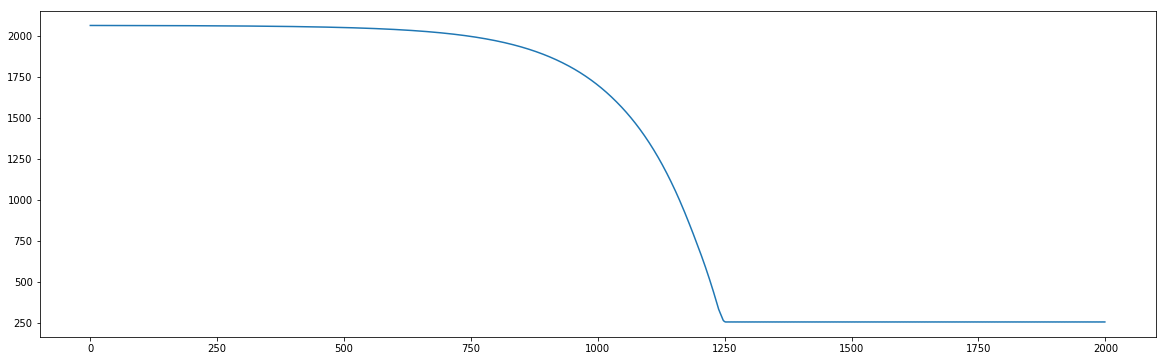

In [174]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(global_mem[:2000])

The model slowly makes progress and then begins plummeting exponentially until it reaches a convergence of about 254 at around the 1250 iteration. It's incredible that a completely linear model - that is, simply choosing whether to go up or go down by a fixed amount - can have such a curved path towards convergence!

# Results

The last iteration has the following parameters.

```
ITERATION 90000
{'A':1.1252999999999862, 'B':4.874700000000292}
Error: 254.17692374220857 
```

This puts the R0 value at around 1.125 in India. This means that if you are living in India, tomorrow, 1.125 people will infected for every currently infected person today.